## Dataset Overview

- This heatmap shows monthly snapshots of confirmed COVID-19 cases by US state. Aggregating daily data into monthly levels reduces noise and makes state-wise surge patterns easier to compare over time.
- This dataset contains daily COVID-19 records at the county level for the United States and its territories (e.g., Puerto Rico, Guam).
- Each row represents a county (or territory) on a specific date, with confirmed cases and deaths.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("usa_county_wise_dataset.csv")
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [6]:
df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0
627919,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/27/20,2375,24


This dataset contains daily COVID-19 records at the county level for the United States and its territories (e.g., Puerto Rico, Guam). Each row represents a county (or territory) on a specific date, with confirmed cases and deaths.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


The dataset contains ~628k records with geographic identifiers (county, state, coordinates), dates, and COVID-19 outcomes (confirmed cases and deaths). Numeric and categorical fields are clearly separated, and the date column is currently stored as text.

In [10]:
df.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


Most county-day records report very low numbers of cases and deaths, while a small number of counties experienced very large outbreaks. This creates a highly skewed distribution, where averages are not representative of typical counties.

In [12]:
df.isna().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

In [13]:
df["Country_Region"].unique()


array(['US'], dtype=object)

Missing values in the FIPS and Admin2 columns occur for special regions (e.g., cruise ships, correctional facilities, and some territories) where county-level identifiers are not applicable. These missing values were retained to avoid introducing incorrect geographic identifiers.

In [15]:
df["Date"] = pd.to_datetime(df["Date"])


C:\Users\aksha\AppData\Local\Temp\ipykernel_36576\4112625705.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [16]:
state_daily = (
    df.groupby(["Date", "Province_State"])[["Confirmed", "Deaths"]]
      .sum()
      .reset_index()
)


County-level time series are highly noisy and difficult to interpret at a national scale. To reveal clearer trends, county data was aggregated to state-level daily totals for confirmed cases and deaths.

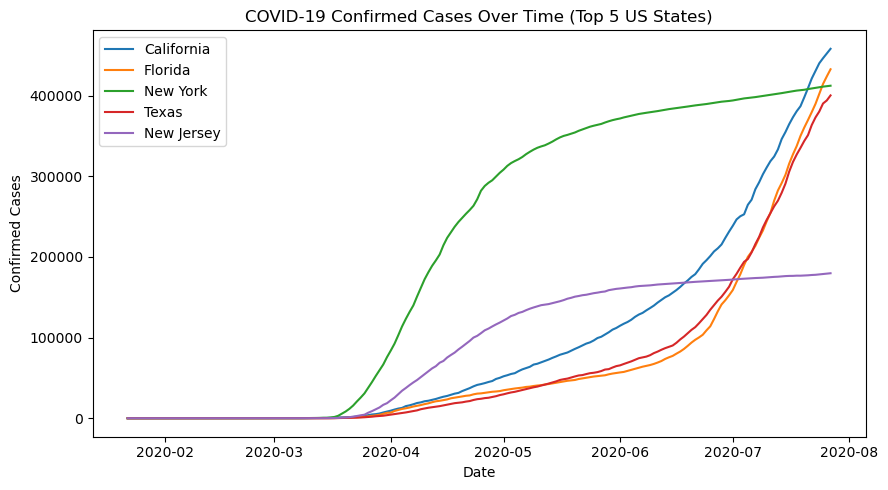

In [18]:
top_states = (
    state_daily.groupby("Province_State")["Confirmed"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

plt.figure(figsize=(9, 5))
for st in top_states:
    d = state_daily[state_daily["Province_State"] == st]
    plt.plot(d["Date"], d["Confirmed"], label=st)

plt.title("COVID-19 Confirmed Cases Over Time (Top 5 US States)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.tight_layout()
plt.show()


This chart shows how confirmed COVID-19 cases evolved over time in the five most affected US states. The steepness of each curve reflects how rapidly cases grew, and differences in timing highlight that states experienced peaks at different periods rather than simultaneously.

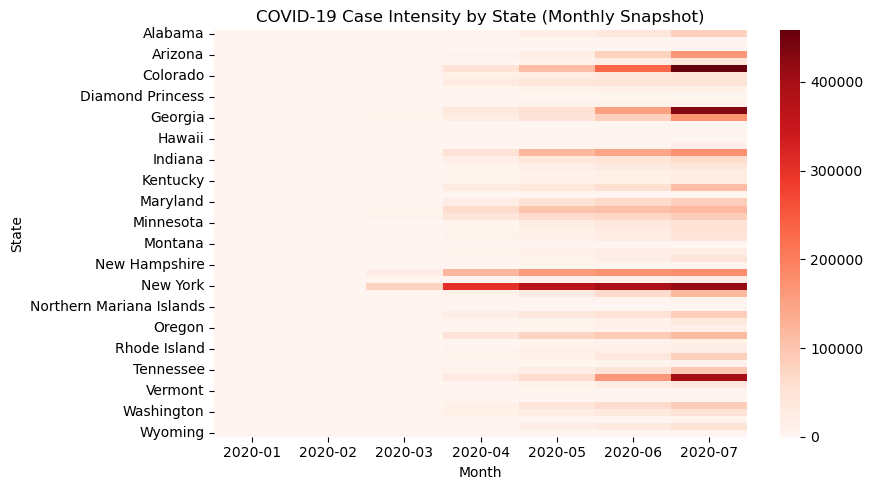

In [32]:
state_daily["Month"] = state_daily["Date"].dt.to_period("M").astype(str)

state_monthly = (
    state_daily.groupby(["Province_State", "Month"])["Confirmed"]
    .max()   # max confirmed in that month (snapshot of level)
    .reset_index()
)

pivot_m = state_monthly.pivot_table(
    index="Province_State",
    columns="Month",
    values="Confirmed",
    aggfunc="max",
    fill_value=0
)

plt.figure(figsize=(9, 5))
sns.heatmap(pivot_m, cmap="Reds")
plt.title("COVID-19 Case Intensity by State (Monthly Snapshot)")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()


This heatmap shows monthly snapshots of confirmed COVID-19 cases by US state. Aggregating daily data into monthly levels reduces noise and makes state-wise surge patterns easier to compare over time.

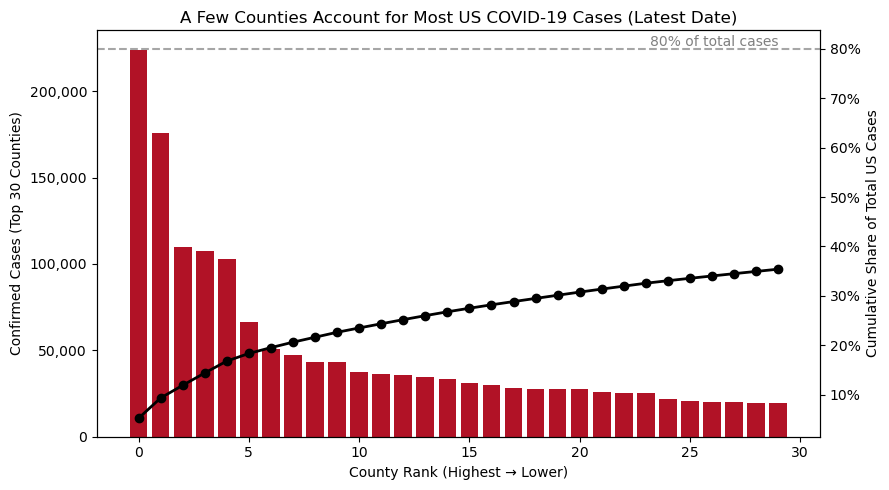

In [36]:
import matplotlib.ticker as mtick

latest_date = df["Date"].max()
latest_us = df[df["Date"] == latest_date].copy()

pareto = latest_us.sort_values("Confirmed", ascending=False)
pareto["cum_share"] = pareto["Confirmed"].cumsum() / pareto["Confirmed"].sum()

top_n = pareto.head(30)  # fewer bars = cleaner

fig, ax1 = plt.subplots(figsize=(9, 5))

# Bars: confirmed cases (dark red)
ax1.bar(range(len(top_n)), top_n["Confirmed"], color="#b11226")
ax1.set_ylabel("Confirmed Cases (Top 30 Counties)")
ax1.set_xlabel("County Rank (Highest → Lower)")
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Line: cumulative share (black)
ax2 = ax1.twinx()
ax2.plot(range(len(top_n)), top_n["cum_share"], color="black", marker="o", linewidth=2)
ax2.set_ylabel("Cumulative Share of Total US Cases")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 80% reference line
ax2.axhline(0.8, linestyle="--", color="gray", alpha=0.7)
ax2.text(len(top_n)-1, 0.8, "80% of total cases", ha="right", va="bottom", color="gray")

plt.title("A Few Counties Account for Most US COVID-19 Cases (Latest Date)")
plt.tight_layout()
plt.show()

In [15]:
df["Combined_Key"].nunique()

3340

In [17]:
df["Combined_Key"].nunique()

3340

The top 30 counties account for roughly one-third of all confirmed COVID-19 cases in the US, indicating that outbreaks are highly concentrated in a small number of geographic hotspots rather than being evenly distributed nationwide.